In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1'

## Data (Preparing and loading)
Data can be anything... in machine learning
* Excel 
* Images
* Text
* Audio
* Videos
* DNA

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representations.


In [2]:
# Create Known parameters using linear regression
weight = 0.7
bias = 0.3

# Create 

start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [3]:
len(X), len(y) , X[:5] , y[:5]

(50,
 50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [4]:
 ## splitting the dataset
train_size = int(0.8 * len(X)) 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# also we can use sklearn for random splitting
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# visualizing the data
def plot_predication(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predication=None):
    """Plot training data, test data and compares predictions"""
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data,train_labels,c="b" ,s=4,label ="Training data")
    
    # plot test data
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    #Are there predictions to plot?
    if predication is not None:
        plt.scatter(test_data,predication,c="r",s=4,label="Predictions")
        
    plt.legend(prop={"size":14})

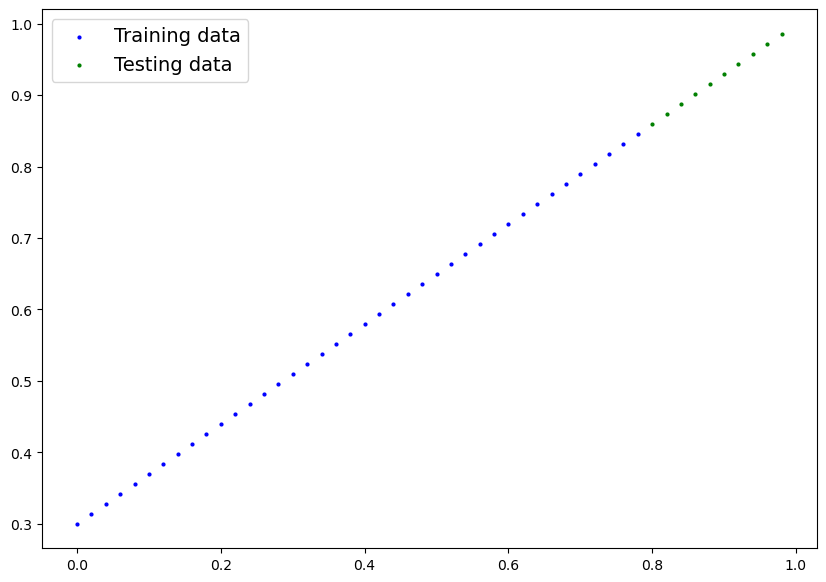

In [7]:
plot_predication()

In [8]:
# Create linear regression model
class LinearRegressionModel(nn.Module):
    # torch.manual_seed(42)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return  self.weights*x + self.bias

In [9]:
# Cheate a random seed

torch.manual_seed(42)

#Create an instance of the model
model = LinearRegressionModel()

#check out the model's parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight , bias

(0.7, 0.3)

In [12]:
# make same predictions
with torch.inference_mode():
    y_pred = model(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

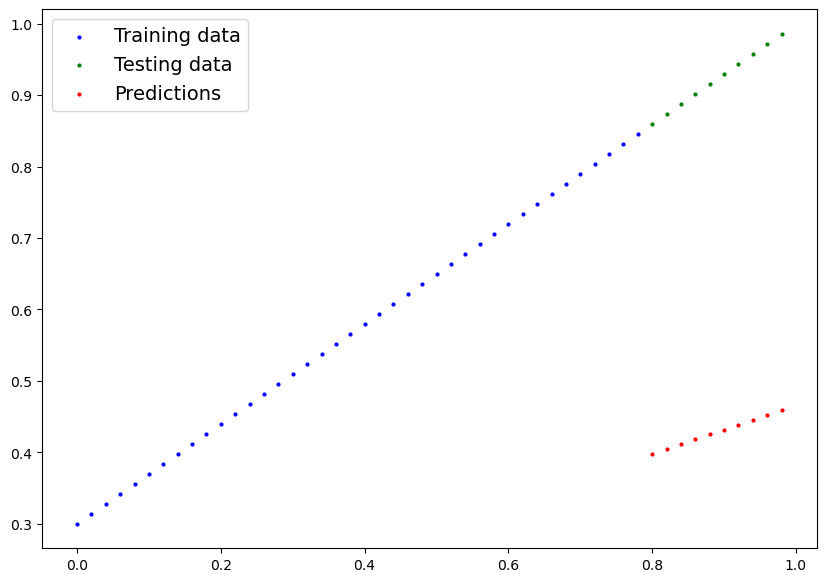

In [13]:
plot_predication(predication=y_pred)

In [14]:
## train model
# setup loss function
loss_fn = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [15]:
# Building a training loop
epochs = 200

epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(list(model.parameters()))
    model.eval()
    
    with torch.inference_mode():
        test_loss = loss_fn(model(X_test),y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())
        print(f"Epoch: {epoch} | Loss: {test_loss:.5f} | Weight: {model.weights.item():.3f} | Bias: {model.bias.item():.3f}")

Epoch: 0 | Loss: 0.48107 | Weight: 0.341 | Bias: 0.139
Epoch: 10 | Loss: 0.34636 | Weight: 0.380 | Bias: 0.239
Epoch: 20 | Loss: 0.21730 | Weight: 0.418 | Bias: 0.333
Epoch: 30 | Loss: 0.14464 | Weight: 0.451 | Bias: 0.377
Epoch: 40 | Loss: 0.11361 | Weight: 0.475 | Bias: 0.387
Epoch: 50 | Loss: 0.09920 | Weight: 0.494 | Bias: 0.384
Epoch: 60 | Loss: 0.08887 | Weight: 0.512 | Bias: 0.379
Epoch: 70 | Loss: 0.08059 | Weight: 0.529 | Bias: 0.372
Epoch: 80 | Loss: 0.07232 | Weight: 0.546 | Bias: 0.365
Epoch: 90 | Loss: 0.06474 | Weight: 0.563 | Bias: 0.357
Epoch: 100 | Loss: 0.05646 | Weight: 0.580 | Bias: 0.350
Epoch: 110 | Loss: 0.04819 | Weight: 0.597 | Bias: 0.343
Epoch: 120 | Loss: 0.04060 | Weight: 0.614 | Bias: 0.336
Epoch: 130 | Loss: 0.03233 | Weight: 0.631 | Bias: 0.329
Epoch: 140 | Loss: 0.02406 | Weight: 0.648 | Bias: 0.322
Epoch: 150 | Loss: 0.01647 | Weight: 0.665 | Bias: 0.314
Epoch: 160 | Loss: 0.00820 | Weight: 0.683 | Bias: 0.307
Epoch: 170 | Loss: 0.00502 | Weight: 0.695

In [16]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

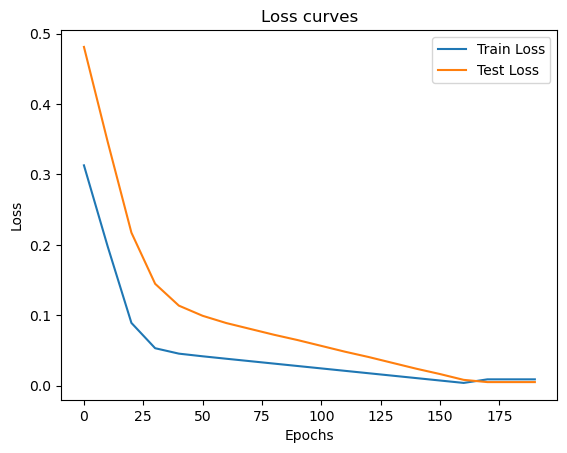

In [17]:

plt.plot(epoch_count,loss_values,label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [18]:
with torch.inference_mode():
    y_pred = model(X_test)

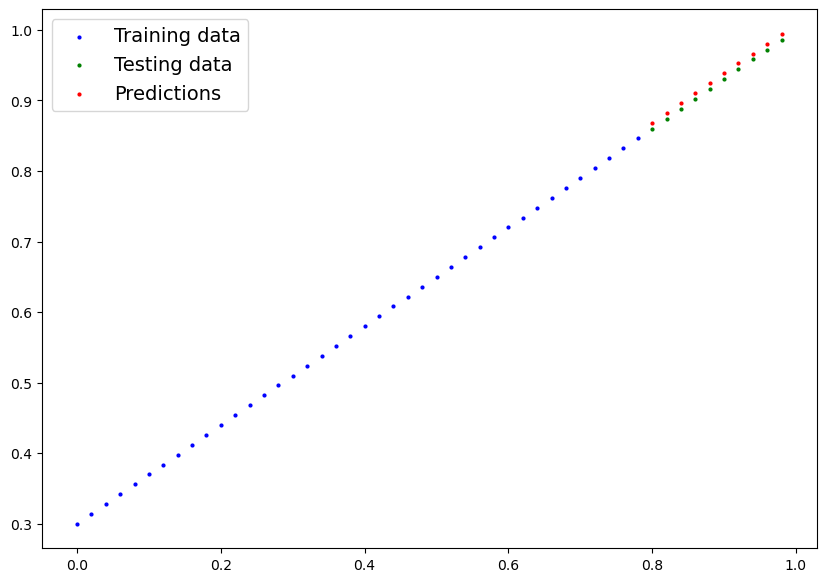

In [19]:
plot_predication(predication=y_pred)

In [20]:
## saving a model in PyTorch
# there are three main ways to save a model in PyTorch
# 1. torch.save() - saves the entire model
# 2. torch.load() - loads the entire model
# 3.torch.nn.Module.load_state_dict() - loads the model's parameters

In [21]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
# saving the model state_dict()
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name = "LinearRegressionModel.pth"

model_save_path = model_path / model_name

print(f"Saving model to : {model_save_path}")
torch.save(obj=model.state_dict() , f=model_save_path)

Saving model to : models/LinearRegressionModel.pth


In [23]:
# torch direct save entire model
torch.save(obj=model,f=model_path / "entire_model.pth")


In [24]:
# load the saved model
loaded_model = LinearRegressionModel()

# load the state_dict
loaded_model.load_state_dict(torch.load(model_save_path))

/tmp/ipykernel_44906/492067558.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


<All keys matched successfully>

In [25]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
direct_save_model = torch.load(model_path / "entire_model.pth")

/tmp/ipykernel_44906/570573415.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  direct_save_model = torch.load(model_path / "entire_model.pth")


In [27]:
direct_save_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
loaded_model.eval()
with torch.inference_mode():
    load_preds = loaded_model(X_test)
    
load_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])